[0, 1, 0, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1]


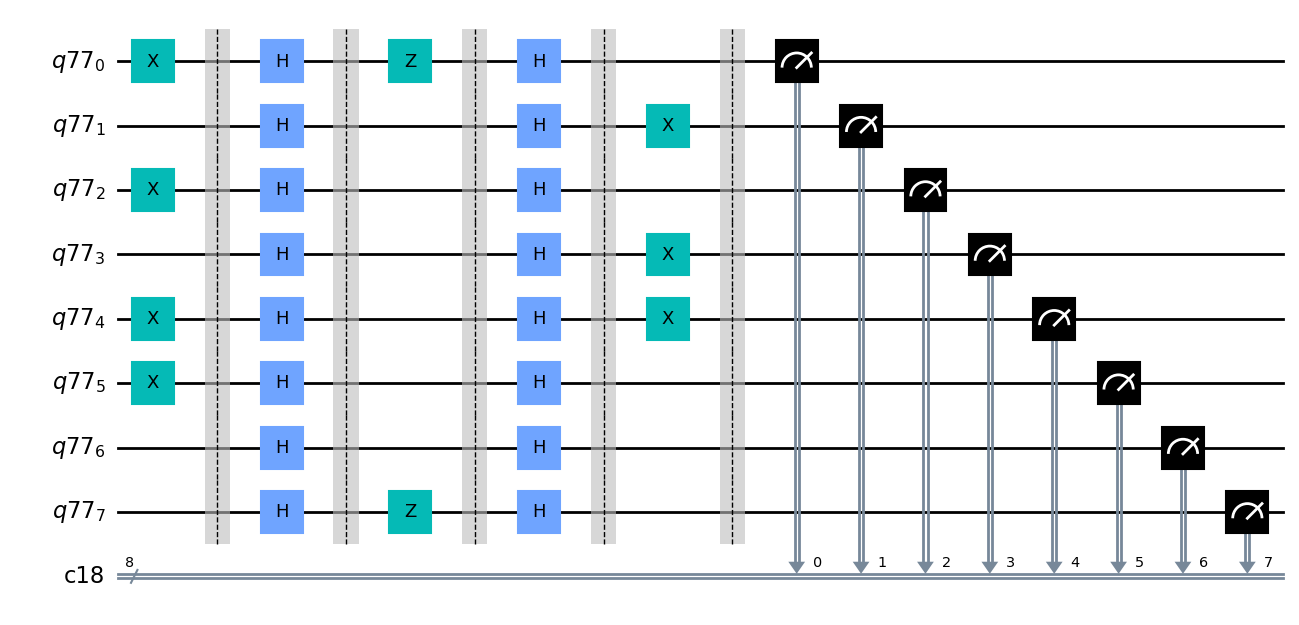

In [32]:
# Encryption

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

qregA = QuantumRegister(8) 
cregA = ClassicalRegister(8)
mycircuitA = QuantumCircuit(qregA,cregA) 


message = [1,0,1,0,1,1,0,0]

for m in range(len(message)):
    if message[m]==1:
        mycircuitA.x(qregA[m])

mycircuitA.barrier()

for i in range(8):        
    mycircuitA.h(qregA[i])        

mycircuitA.barrier()


key2=[]



for j in range(8):
    b = randrange(2)
    key2.append(b)
    if b==1:
        mycircuitA.z(qregA[j])
        
mycircuitA.barrier()
mycircuitA.h(qregA)        
mycircuitA.barrier()
        
key1=[]

for i in range(8):
    a=randrange(2)
    key1.append(a)
    if a==1:
        mycircuitA.x(qregA[i])    



print(key1)
print(key2)
        
        
mycircuitA.barrier()
mycircuitA.measure(qregA,cregA)
mycircuitA.draw(output='mpl')

In [33]:

job = execute(mycircuitA,Aer.get_backend('qasm_simulator'))
encryption = job.result().get_counts(mycircuitA)


print("Encryption", encryption)

encrypted_message=list(map(int,[*list(encryption.keys())[0]]))


encrypted_message.reverse()
print()
print("Message:", message)
print("Key1:", key1)
print("Key2:", key2)
print()
print("Encrypted Message:", encrypted_message)

Encryption {'10101110': 1024}

Message: [1, 0, 1, 0, 1, 1, 0, 0]
Key1: [0, 1, 0, 1, 1, 0, 0, 0]
Key2: [1, 0, 0, 0, 0, 0, 0, 1]

Encrypted Message: [0, 1, 1, 1, 0, 1, 0, 1]


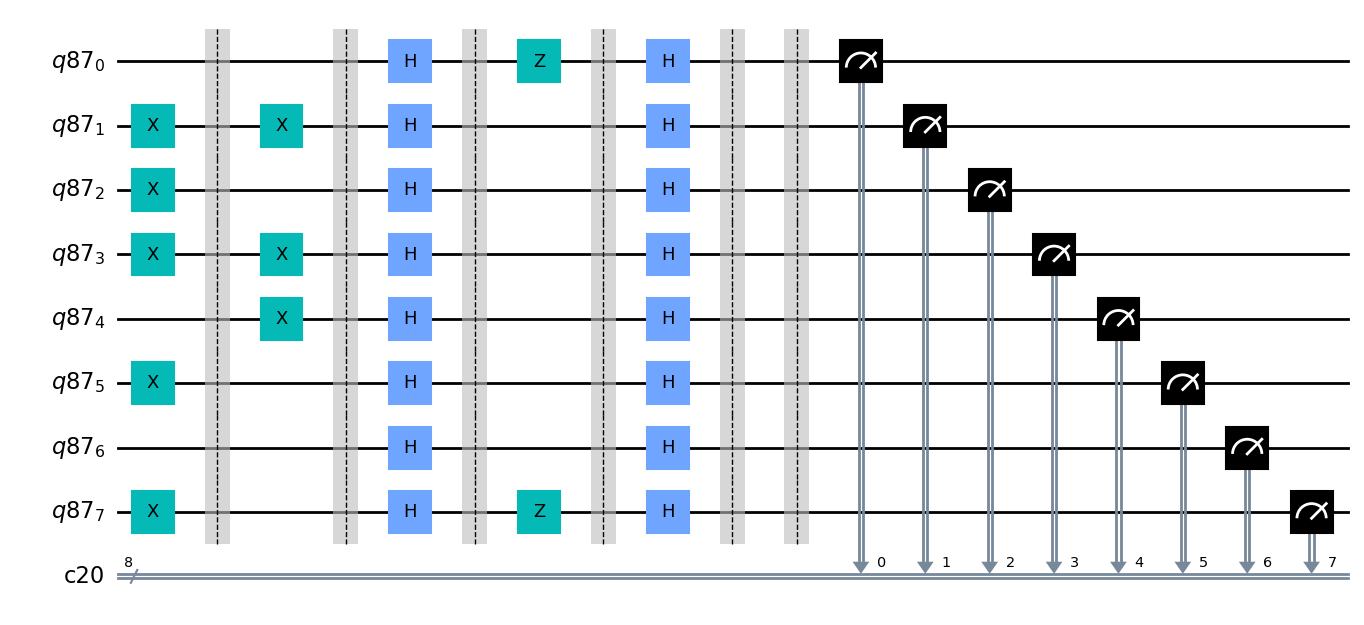

In [36]:
# Decryption


from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange


qregA = QuantumRegister(8)
cregB = ClassicalRegister(8)
qc = QuantumCircuit(qregA, cregB)



for m in range(len(encrypted_message)):
    if encrypted_message[m]==1:
        qc.x(qregA[m])

qc.barrier()

for n in range(len(key1)):
    if key1[n]==1:
        qc.x(qregA[n])

qc.barrier()
qc.h(qregA)
qc.barrier()

for n in range(len(key2)):
    if key2[n]==1:
        qc.z(qregA[n])

qc.barrier()
qc.h(qregA)
qc.barrier()
        
qc.barrier()

qc.measure(qregA,cregB)

qc.draw(output='mpl')

In [37]:
job = execute(qc,Aer.get_backend('qasm_simulator'))
decryption = job.result().get_counts(qc)


print("Decryption", decryption)

decrypted_message=list(map(int,[*list(decryption.keys())[0]]))


decrypted_message.reverse()
print()
print("Message:", message)
print("Decrypted Message:", decrypted_message)
print()  
  
if message == decrypted_message:  
    print("Protocol is correct!")  
else:  
    print("Protocol is incorrect!")

Decryption {'00110101': 1024}

Message: [1, 0, 1, 0, 1, 1, 0, 0]
Decrypted Message: [1, 0, 1, 0, 1, 1, 0, 0]

Protocol is correct!
